In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [34]:
from datetime import datetime

# Define the desired data range
start_date = '2022-06-24'
end_date = '2023-06-24'

# Convert strings to date objects for further use, if needed
start_date_obj = datetime.strptime(start_date, '%Y-%m-%d')
end_date_obj = datetime.strptime(end_date, '%Y-%m-%d')


In [35]:
print('Our date will be between these dates', start_date, 'to', end_date)

Our date will be between these dates 2022-06-24 to 2023-06-24


In [36]:
# DEfine the ticker
ticker = 'GOOGL'
data = yf.download(ticker, start = start_date, end = end_date, progress=False)
data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2022-06-24,117.548874,117.652502,112.544516,112.586866,41164000
2022-06-27,115.415115,118.151191,114.763471,117.845803,36420000
2022-06-28,111.602928,116.885779,111.444004,115.384219,35792000
2022-06-29,111.298035,112.751764,110.472027,111.149077,24716000
2022-06-30,108.569420,110.487470,106.364416,109.602677,43170000


In [37]:
# Remove multi-level columns (..., duplicate 'GOOGL' headers)
data.columns = data.columns.droplevel(1)
data.columns.name = None
data.index = data.index.strftime('%Y-%m-%d')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2022-06-24 to 2023-06-23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   251 non-null    float64
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
 3   Open    251 non-null    float64
 4   Volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8+ KB


In [39]:
# Step 1: Copy the index to a new column named 'Date'
data['Date'] = data.index

# Step 2: Reset the index, dropping the current index and replacing it eith a default interger-based index
data.reset_index(drop=True, inplace=True)

In [40]:
data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Date'], dtype='object')

In [41]:
# Changing the sequence of the columns
data = data[[ 'Date', 'Close', 'High', 'Low', 'Open', 'Volume']]

In [42]:
data.head()

,Date,Close,High,Low,Open,Volume
0,2022-06-24,117.548874,117.652502,112.544516,112.586866,41164000
1,2022-06-27,115.415115,118.151191,114.763471,117.845803,36420000
2,2022-06-28,111.602928,116.885779,111.444004,115.384219,35792000
3,2022-06-29,111.298035,112.751764,110.472027,111.149077,24716000
4,2022-06-30,108.569420,110.487470,106.364416,109.602677,43170000


In [43]:
# Selecting columns to be used
data = data[['Date', 'Close']]
data.head()

,Date,Close
0,2022-06-24,117.548874
1,2022-06-27,115.415115
2,2022-06-28,111.602928
3,2022-06-29,111.298035
4,2022-06-30,108.569420


In [44]:
# Plotting the data using plotly
fig = px.line(data, x='Date', y='Close', title='Stock Price Over Time')
fig.show()

In [45]:
# ADF Test
def adf_test(data): # Define the ADF test function
  result = adfuller(data) #Perform the ADF test
  print('ADF Statistic: %f' % result[0]) # Print the ADF statistic
  print('p-value: %f' % result[1]) # Print the p-value
  
  if result[1] <= 0.05:  # Check if p-value is less than or equal to 0.05
        print('Reject null hypothesis, data is stationary') # Reject null hypothesis if p-value is <= 0.05
  else: # If p-value is greater than 0.05
        print('Fail to reject null hypothesis, data is non-stationary') # Fail to reject null hypothesis if p-value > 0.05

adf_test(data['Close']) # Call the ADF test function on   the 'Close' column of df

ADF Statistic: -1.554810
p-value: 0.506245
Fail to reject null hypothesis, data is non-stationary


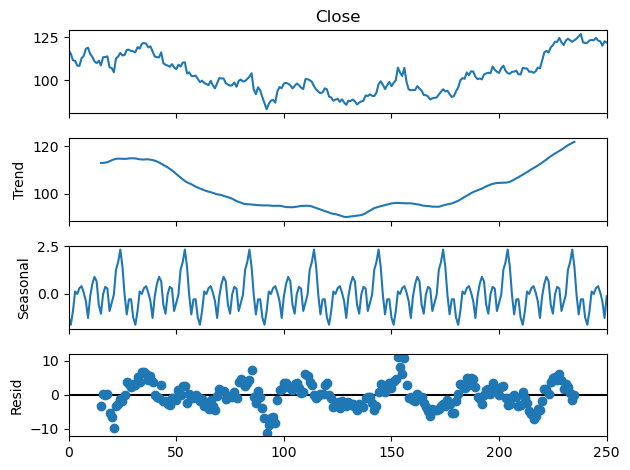

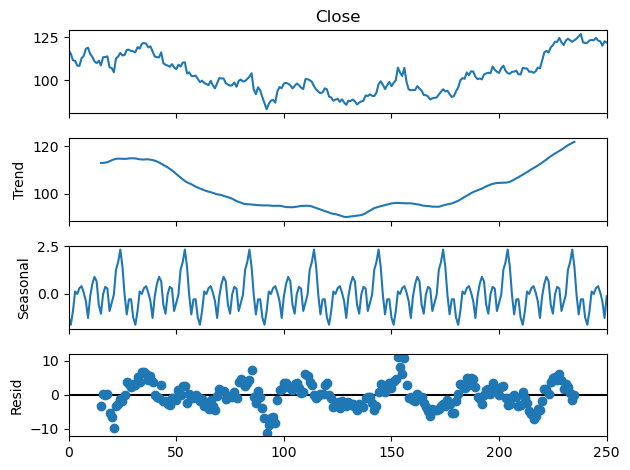

In [46]:
# Decompose the data to see the trend, seasonality and residuals

decompose = seasonal_decompose(data['Close'], model='additive', period = 30)
decompose.plot()

# Finding the d value

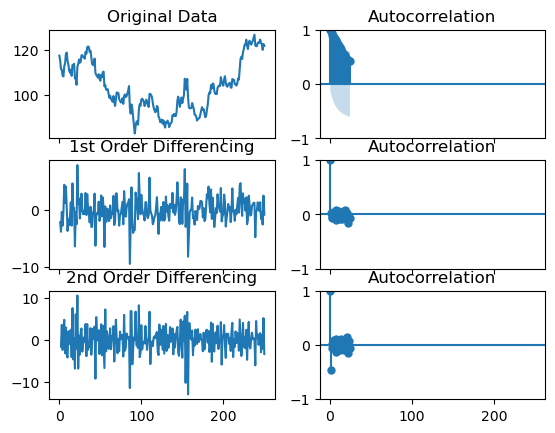

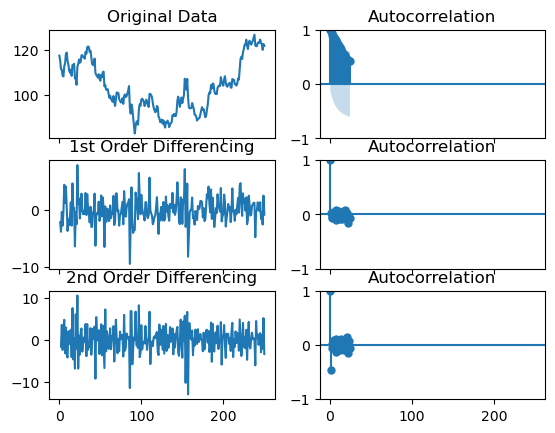

In [47]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(3,2,sharex=True)

axes[0,0].plot(data['Close'])
axes[0,0].set_title('Original Data')
plot_acf(data['Close'], ax=axes[0,1])
axes[1,0].plot(data['Close'].diff())
axes[1,0].set_title('1st Order Differencing')
plot_acf(data['Close'].diff().dropna(), ax=axes[1,1])
axes[2,0].plot(data['Close'].diff().diff())
axes[2,0].set_title('2nd Order Differencing')
plot_acf(data['Close'].diff().diff().dropna(),ax=axes[2,1])


d = 1

### Finding the p value

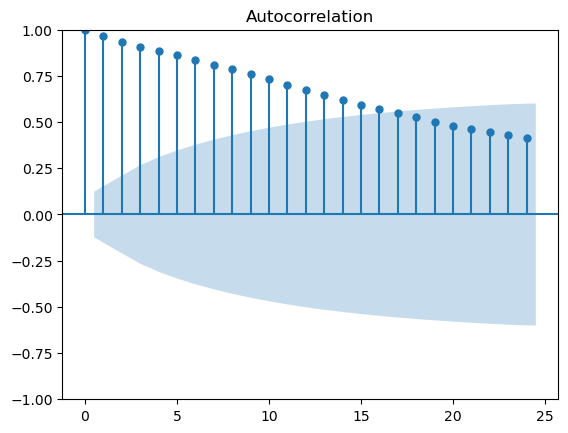

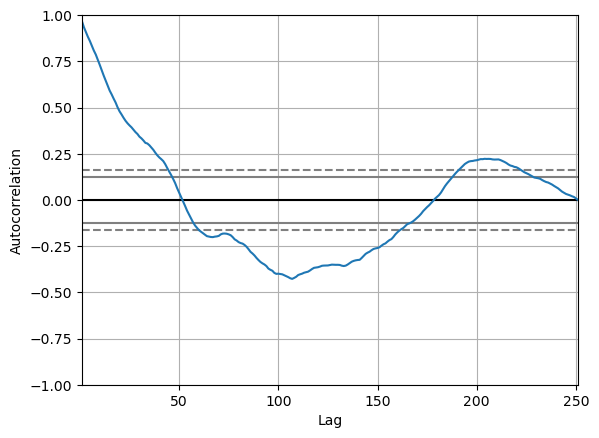

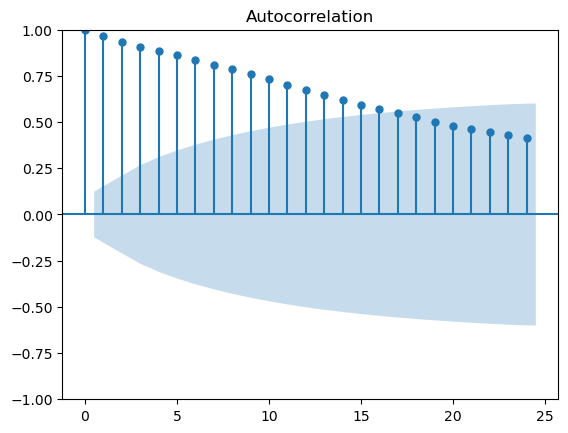

In [48]:
# AutoCorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

pd.plotting.autocorrelation_plot(data['Close'])
plot_acf(data['Close'], alpha=0.05)

In [49]:
from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(data['Close']))

print(x_acf)

           0
0   1.000000
1   0.967680
2   0.934869
3   0.908629
4   0.882970
5   0.860408
6   0.834713
7   0.808552
8   0.786573
9   0.759204
10  0.730694
11  0.700909
12  0.672313
13  0.645865
14  0.618340
15  0.591556
16  0.570855
17  0.548070
18  0.526802
19  0.500679
20  0.478966
21  0.462213
22  0.444280
23  0.428058


p = 2

### Finding the q value

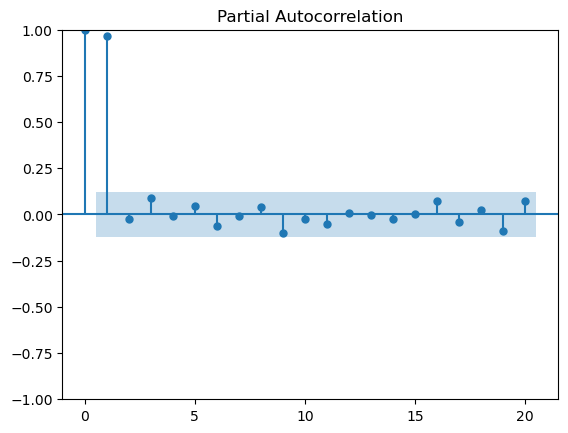

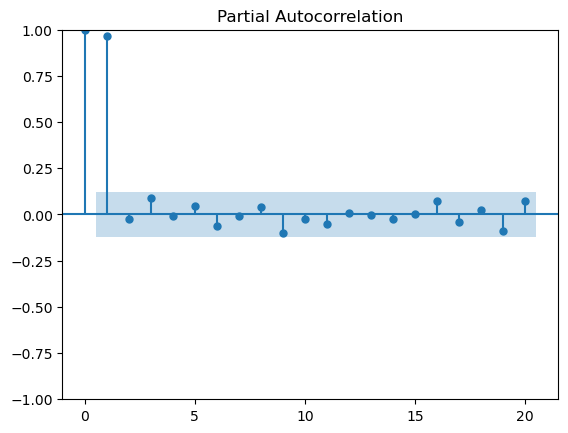

In [50]:
# Partial auto correlation
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(data['Close'], lags=20, alpha=0.05)

q = 2

In [51]:
# Defining the p, d, q values 
p = 2
d = 1
q = 2

In [52]:
# Running the ARIMA with PMDARIMA
from pmdarima.arima import auto_arima

model = auto_arima(data['Close'], start_p=1, start_q=1, max_p=2, max_q=2, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)

c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1271.360, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1209.585, Time=0.06 sec


c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1273.360, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1175.306, Time=0.14 sec


c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.46 sec


c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1173.308, Time=0.09 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1207.809, Time=0.04 sec


c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.16 sec


c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1175.306, Time=0.20 sec


c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1172.506, Time=0.56 sec


c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(1,1,0)[12]             : AIC=inf, Time=0.34 sec


c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=0.99 sec


c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.52 sec


c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,1)(2,1,0)[12]             : AIC=1176.261, Time=0.45 sec


c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,2)(2,1,0)[12]             : AIC=1176.280, Time=0.40 sec


c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,2)(2,1,0)[12]             : AIC=1174.758, Time=0.29 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1175.079, Time=0.20 sec


c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,2)(2,1,0)[12]             : AIC=inf, Time=1.50 sec


c:\Users\NMH\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(2,1,0)[12] intercept   : AIC=inf, Time=1.83 sec

Best model:  ARIMA(1,1,1)(2,1,0)[12]          
Total fit time: 9.756 seconds


In [53]:
# Summary of the model `ARIMA(0,1,0)(2,1,0)[12]`    
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  251
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood                -581.253
Date:                             Mon, 17 Feb 2025   AIC                           1172.506
Time:                                     22:31:41   BIC                           1189.867
Sample:                                          0   HQIC                          1179.503
                                             - 251                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9116      0.059     15.523      0.000       0.797       1.027
ma.L1         -0.9735      

In [54]:
# Stats model and applying arima
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 2, 1, 2

model = ARIMA(data['Close'], order=(p, d, q))
model = model.fit()

# print(model.summary())

# Predict the next 30 days
forecast = model.predict(len(data['Close']), len(data['Close'])+30)
# print(forecast)

# plot forecast
# plt.figure(figsize=(10, 5))
# plt.plot(df['Close'], label='Actual')
# plt.plot(forecast, label='forecast')

In [55]:
# Running with SARIMA
import statsmodels.api as sm
import warnings

p, d, q = 2, 1, 2

model = sm.tsa.statespace.SARIMAX(data['Close'], order=(p, d, q), seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

c:\Users\NMH\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -559.863
Date:                            Mon, 17 Feb 2025   AIC                           1137.725
Time:                                    22:31:44   BIC                           1168.976
Sample:                                         0   HQIC                          1150.320
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0040      0.796     -0.005      0.996      -1.564       1.556
ar.L2          0.9960      0.793   

c:\Users\NMH\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



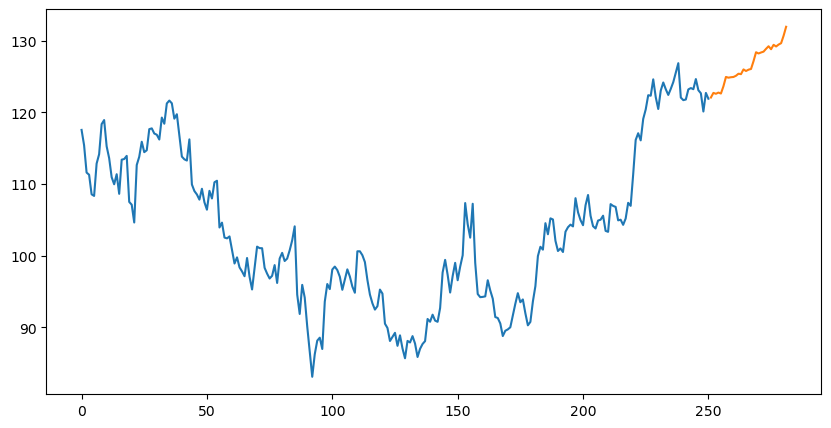

In [60]:
# Predictions
predictions = model.predict(start=len(data['Close']), end=len(data['Close'])+30)

# plot forecast
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Actual')
plt.plot(predictions, label='predictions')